In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import losses
from keras.layers import Dense

In [2]:
data = pd.read_csv('daily-total-female-births-in-ca.csv')
data.head(10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


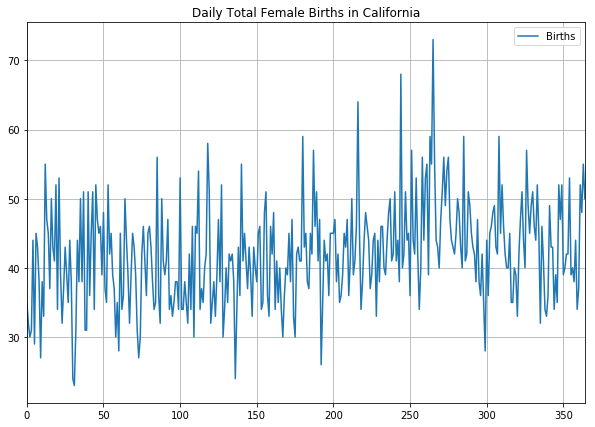

In [3]:
data.plot(figsize=(10,7))
plt.title('Daily Total Female Births in California')
plt.grid(True)
plt.show()

In [4]:
rol_mean = data['Births'].rolling(window=12).mean()
rol_std = data['Births'].rolling(window=12).std()
#rol_mean = data.rolling(window=12).mean()
#rol_std = data.rolling(window=12).std()
#print(rol_mean, rol_std)
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('daily-total-female-births-in-ca.csv', parse_dates=['Date'], date_parser=dateparse)

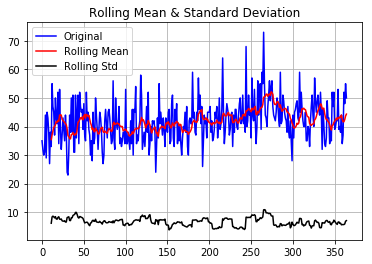

In [5]:
original = plt.plot(data['Births'], color='blue', label='Original')
mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
std = plt.plot(rol_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.grid(True)
plt.show(block=False)

In [6]:
print('Results of Dickey-Fuller Test:')
df_test = adfuller(data['Births'], autolag='AIC')
df_output = pd.Series(df_test[0:4],
                    index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
                    )
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


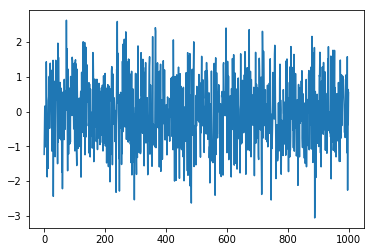

In [7]:
# [w = random.randint(1,101) for i in range(100)]
w = np.random.normal(0, 1, 1000)
plt.plot(w)

In [8]:
print('Results of Dickey-Fuller Test:')
df_test = adfuller(w, autolag='AIC')
df_output = pd.Series(df_test[0:4],
                    index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
                    )
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Results of Dickey-Fuller Test:
Test Statistic                 -31.104183
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [9]:
#Mean absolute percentage error (MAPE)

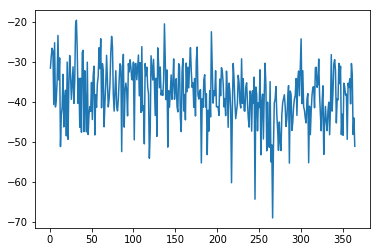

In [7]:
diff = np.log(data['Births']) - data['Births'].shift()
plt.plot(diff)

In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [9]:
X, y = split_sequence(sequence=data['Births'], n_steps=3)

for i in range(len(X)):
    print(X[i], y[i])

[35 32 30] 31
[32 30 31] 44
[30 31 44] 29
[31 44 29] 45
[44 29 45] 43
[29 45 43] 38
[45 43 38] 27
[43 38 27] 38
[38 27 38] 33
[27 38 33] 55
[38 33 55] 47
[33 55 47] 45
[55 47 45] 37
[47 45 37] 50
[45 37 50] 43
[37 50 43] 41
[50 43 41] 52
[43 41 52] 34
[41 52 34] 53
[52 34 53] 39
[34 53 39] 32
[53 39 32] 37
[39 32 37] 43
[32 37 43] 39
[37 43 39] 35
[43 39 35] 44
[39 35 44] 38
[35 44 38] 24
[44 38 24] 23
[38 24 23] 31
[24 23 31] 44
[23 31 44] 38
[31 44 38] 50
[44 38 50] 38
[38 50 38] 51
[50 38 51] 31
[38 51 31] 31
[51 31 31] 51
[31 31 51] 36
[31 51 36] 45
[51 36 45] 51
[36 45 51] 34
[45 51 34] 52
[51 34 52] 47
[34 52 47] 45
[52 47 45] 46
[47 45 46] 39
[45 46 39] 48
[46 39 48] 37
[39 48 37] 35
[48 37 35] 52
[37 35 52] 42
[35 52 42] 45
[52 42 45] 39
[42 45 39] 37
[45 39 37] 30
[39 37 30] 35
[37 30 35] 28
[30 35 28] 45
[35 28 45] 34
[28 45 34] 36
[45 34 36] 50
[34 36 50] 44
[36 50 44] 39
[50 44 39] 32
[44 39 32] 39
[39 32 39] 45
[32 39 45] 43
[39 45 43] 39
[45 43 39] 31
[43 39 31] 27
[39 31

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

[44 40 57] 49
[38 33 55] 47
[47 33 30] 42
[44 41 42] 36
[42 51 41] 44
[42 45 39] 37
[30 42 43] 41
[44 39 32] 39
[39 44 45] 33
[24 34 43] 36
[39 44 48] 50
[42 45 50] 48
[52 34 53] 39
[44 38 68] 40
[36 45 51] 34
[46 51 41] 47
[52 39 40] 42
[35 28 45] 34
[35 32 42] 34
[30 34 40] 35
[39 35 52] 47
[50 48 43] 40
[44 45 36] 57
[51 36 45] 51
[57 46 51] 41
[31 44 38] 50
[46 39 48] 37
[36 45 46] 48
[45 38 47] 33
[33 39 47] 38
[46 34 35] 48
[45 46 34] 35
[45 34 36] 50
[39 31 27] 30
[68 40 42] 51
[48 49 43] 42
[38 52 30] 34
[44 48 50] 41
[45 49 51] 46
[56 36 32] 50
[35 52 42] 45
[57 49 45] 49
[43 41 41] 59
[40 38 44] 34
[38 24 23] 31
[46 44 52] 45
[36 55 41] 45
[43 42 45] 50
[38 47 38] 36
[45 54 34] 37
[48 34 41] 35
[44 34 37] 52
[49 43 42] 59
[35 28 44] 36
[53 55 39] 59
[49 51 46] 44
[34 36 50] 44
[42 34 40] 56
[34 53 34] 34
[43 47 36] 41
[54 34 37] 35
[51 31 31] 51
[41 41 59] 43
[46 41 34] 33
[34 35 56] 36
[37 35 52] 42
[40 39 44] 48
[45 35 35] 40
[51 44 45] 36
[45 51 34] 52
[45 45 45] 47
[42 38

In [12]:
mlp_model = Sequential()

mlp_model.add(
    Dense(
        units=2,
        activation='relu',
        kernel_initializer='random_normal',
        input_dim=3
    )
)

mlp_model.add(
    Dense(
        units=3,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

mlp_model.add(
    Dense(
        units=1,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

In [15]:
mlp_model.compile(optimizer='adam',
                  loss=losses.mean_absolute_percentage_error,
                  metrics=['accuracy']
                 )

In [16]:
model_trained = mlp_model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test)
)

Train on 253 samples, validate on 109 samples
Epoch 1/50
253/253 [==============================] - 1s 4ms/step - loss: 99.9861 - acc: 0.0000e+00 - val_loss: 99.9705 - val_acc: 0.0000e+00
Epoch 2/50
253/253 [==============================] - 0s 77us/step - loss: 99.9589 - acc: 0.0000e+00 - val_loss: 99.9394 - val_acc: 0.0000e+00
Epoch 3/50
253/253 [==============================] - 0s 77us/step - loss: 99.9259 - acc: 0.0000e+00 - val_loss: 99.9003 - val_acc: 0.0000e+00
Epoch 4/50
253/253 [==============================] - 0s 85us/step - loss: 99.8824 - acc: 0.0000e+00 - val_loss: 99.8451 - val_acc: 0.0000e+00
Epoch 5/50
253/253 [==============================] - 0s 107us/step - loss: 99.8197 - acc: 0.0000e+00 - val_loss: 99.7639 - val_acc: 0.0000e+00
Epoch 6/50
253/253 [==============================] - 0s 73us/step - loss: 99.7282 - acc: 0.0000e+00 - val_loss: 99.6477 - val_acc: 0.0000e+00
Epoch 7/50
253/253 [==============================] - 0s 66us/step - loss: 99.5984 - acc: 0.0000

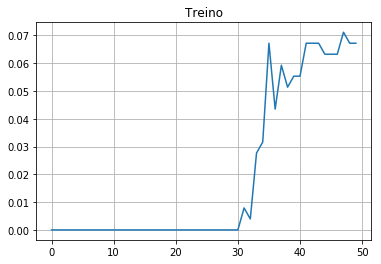

In [17]:
plt.title('Treino')
plt.grid(True)
plt.plot(model_trained.history['acc'])
plt.show()

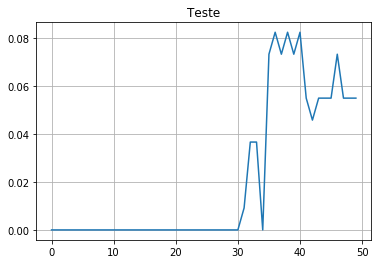

In [18]:
plt.title('Teste')
plt.grid(True)
plt.plot(model_trained.history['val_acc'])
plt.show()

In [19]:
model_trained = mlp_model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test)
)

Train on 253 samples, validate on 109 samples
Epoch 1/100
253/253 [==============================] - 0s 62us/step - loss: 14.6095 - acc: 0.0672 - val_loss: 15.4422 - val_acc: 0.0550
Epoch 2/100
253/253 [==============================] - 0s 52us/step - loss: 14.6179 - acc: 0.0711 - val_loss: 15.4964 - val_acc: 0.0642
Epoch 3/100
253/253 [==============================] - 0s 56us/step - loss: 14.6095 - acc: 0.0632 - val_loss: 15.4605 - val_acc: 0.0550
Epoch 4/100
253/253 [==============================] - 0s 112us/step - loss: 14.6117 - acc: 0.0672 - val_loss: 15.4293 - val_acc: 0.0550
Epoch 5/100
253/253 [==============================] - 0s 92us/step - loss: 14.5967 - acc: 0.0632 - val_loss: 15.4671 - val_acc: 0.0550
Epoch 6/100
253/253 [==============================] - 0s 68us/step - loss: 14.6029 - acc: 0.0711 - val_loss: 15.5041 - val_acc: 0.0734
Epoch 7/100
253/253 [==============================] - 0s 109us/step - loss: 14.5998 - acc: 0.0593 - val_loss: 15.4984 - val_acc: 0.0642


253/253 [==============================] - 0s 84us/step - loss: 14.5541 - acc: 0.0632 - val_loss: 15.3907 - val_acc: 0.0459
Epoch 61/100
253/253 [==============================] - 0s 87us/step - loss: 14.5473 - acc: 0.0632 - val_loss: 15.4041 - val_acc: 0.0459
Epoch 62/100
253/253 [==============================] - 0s 75us/step - loss: 14.5435 - acc: 0.0632 - val_loss: 15.3921 - val_acc: 0.0459
Epoch 63/100
253/253 [==============================] - 0s 74us/step - loss: 14.5416 - acc: 0.0632 - val_loss: 15.4000 - val_acc: 0.0459
Epoch 64/100
253/253 [==============================] - 0s 64us/step - loss: 14.5718 - acc: 0.0593 - val_loss: 15.3388 - val_acc: 0.0734
Epoch 65/100
253/253 [==============================] - 0s 69us/step - loss: 14.5444 - acc: 0.0632 - val_loss: 15.3949 - val_acc: 0.0459
Epoch 66/100
253/253 [==============================] - 0s 56us/step - loss: 14.5412 - acc: 0.0593 - val_loss: 15.3955 - val_acc: 0.0459
Epoch 67/100
253/253 [==============================] 

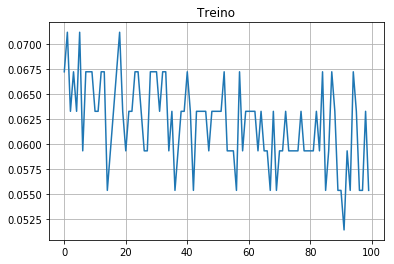

In [20]:
plt.title('Treino')
plt.grid(True)
plt.plot(model_trained.history['acc'])
plt.show()

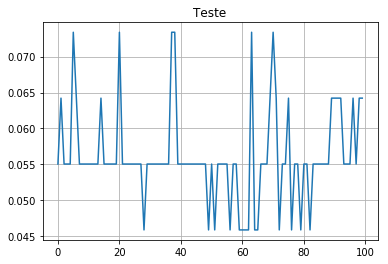

In [21]:
plt.title('Teste')
plt.grid(True)
plt.plot(model_trained.history['val_acc'])
plt.show()